# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from scipy import stats

# Prepare datasets

In [2]:
df_x = pd.read_csv('../data/dataset_01/data.csv')
df_y = pd.read_csv('../data/dataset_01/answer.csv')

In [3]:
# df_x = df_x.drop(labels=['Unnamed: 0'], axis=1)
df_x

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,12.0,9.0,4.0,3.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,20.0,14.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,21.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,0.0,6.0,0.0,12.0,0.0,0.0,0.0
2496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,13.0,10.0,15.0,0.0,0.0,0.0
2497,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,4.0,0.0,4.0,5.0,0.0,0.0,11.0,7.0
2498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,12.0,19.0,2.0,0.0,0.0,1.0,0.0


In [4]:
# df_y = df_y.drop(labels=['Unnamed: 0'], axis=1)
df_y

,x1,y1,z1,x2,y2,z2
0,1.62606,-0.801,4.74964,7.60840,26.812,2.75866
1,6.54501,-0.801,4.20302,2.13407,26.812,3.88737
2,3.46594,26.812,2.80550,5.76182,-0.801,2.63862
3,5.28630,-0.801,5.03381,7.38835,26.812,3.39033
4,2.71396,26.812,4.48287,2.39695,-0.801,2.70770
...,...,...,...,...,...,...
2495,7.75790,-0.801,4.62405,6.93627,26.812,2.88103
2496,5.54549,-0.801,4.11952,2.97840,26.812,3.58746
2497,5.59828,26.812,3.78629,2.16425,-0.801,3.33187
2498,6.80879,-0.801,5.00507,2.30580,26.812,2.72997


In [5]:
df = pd.concat([df_x, df_y], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,668,669,670,671,x1,y1,z1,x2,y2,z2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0.0,0.0,1.62606,-0.801,4.74964,7.60840,26.812,2.75866
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.54501,-0.801,4.20302,2.13407,26.812,3.88737
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,1.0,0.0,3.46594,26.812,2.80550,5.76182,-0.801,2.63862
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,5.28630,-0.801,5.03381,7.38835,26.812,3.39033
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,2.71396,26.812,4.48287,2.39695,-0.801,2.70770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,7.75790,-0.801,4.62405,6.93627,26.812,2.88103
2496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,5.54549,-0.801,4.11952,2.97840,26.812,3.58746
2497,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,7.0,5.59828,26.812,3.78629,2.16425,-0.801,3.33187
2498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,6.80879,-0.801,5.00507,2.30580,26.812,2.72997


In [6]:
labels = [str(i) for i in range(672)]

In [7]:
df = df.drop_duplicates(subset=labels, ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,668,669,670,671,x1,y1,z1,x2,y2,z2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0.0,0.0,1.62606,-0.801,4.74964,7.60840,26.812,2.75866
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.54501,-0.801,4.20302,2.13407,26.812,3.88737
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,1.0,0.0,3.46594,26.812,2.80550,5.76182,-0.801,2.63862
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,5.28630,-0.801,5.03381,7.38835,26.812,3.39033
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,2.71396,26.812,4.48287,2.39695,-0.801,2.70770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,7.75790,-0.801,4.62405,6.93627,26.812,2.88103
1996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,5.54549,-0.801,4.11952,2.97840,26.812,3.58746
1997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,7.0,5.59828,26.812,3.78629,2.16425,-0.801,3.33187
1998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,6.80879,-0.801,5.00507,2.30580,26.812,2.72997


In [8]:
df_x = df.drop(labels=['x1', 'y1', 'z1', 'x2', 'y2', 'z2'], axis=1)
df_x

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,12.0,9.0,4.0,3.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,20.0,14.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,21.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,0.0,6.0,0.0,12.0,0.0,0.0,0.0
1996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,13.0,10.0,15.0,0.0,0.0,0.0
1997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,4.0,0.0,4.0,5.0,0.0,0.0,11.0,7.0
1998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,12.0,19.0,2.0,0.0,0.0,1.0,0.0


In [9]:
df_y = df.drop(labels=labels, axis=1)
df_y

,x1,y1,z1,x2,y2,z2
0,1.62606,-0.801,4.74964,7.60840,26.812,2.75866
1,6.54501,-0.801,4.20302,2.13407,26.812,3.88737
2,3.46594,26.812,2.80550,5.76182,-0.801,2.63862
3,5.28630,-0.801,5.03381,7.38835,26.812,3.39033
4,2.71396,26.812,4.48287,2.39695,-0.801,2.70770
...,...,...,...,...,...,...
1995,7.75790,-0.801,4.62405,6.93627,26.812,2.88103
1996,5.54549,-0.801,4.11952,2.97840,26.812,3.58746
1997,5.59828,26.812,3.78629,2.16425,-0.801,3.33187
1998,6.80879,-0.801,5.00507,2.30580,26.812,2.72997


In [10]:
df_x = np.reshape(df_x.to_numpy(), (-1, 1, 24, 28))
df_x.shape

(2000, 1, 24, 28)

In [11]:
df_y = df_y.to_numpy()
df_y

array([[ 1.62606, -0.801  ,  4.74964,  7.6084 , 26.812  ,  2.75866],
       [ 6.54501, -0.801  ,  4.20302,  2.13407, 26.812  ,  3.88737],
       [ 3.46594, 26.812  ,  2.8055 ,  5.76182, -0.801  ,  2.63862],
       ...,
       [ 5.59828, 26.812  ,  3.78629,  2.16425, -0.801  ,  3.33187],
       [ 6.80879, -0.801  ,  5.00507,  2.3058 , 26.812  ,  2.72997],
       [ 5.8794 , -0.801  ,  4.52526,  3.092  , 26.812  ,  2.80852]])

In [12]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.9)

train_x, valid_x, train_y, valid_y = train_test_split(train_x,
                                                    train_y,
                                                    test_size=0.33)

In [13]:
print(train_x.shape), print(train_y.shape)
print(valid_x.shape), print(valid_y.shape)
print(test_x.shape), print(test_y.shape)

(1206, 1, 24, 28)
(1206, 6)
(594, 1, 24, 28)
(594, 6)
(200, 1, 24, 28)
(200, 6)


(None, None)

In [14]:
train_x = torch.tensor(train_x).float()
train_y = torch.tensor(train_y).float()
valid_x = torch.tensor(valid_x).float()
valid_y = torch.tensor(valid_y).float()
test_x = torch.tensor(test_x).float()
test_y = torch.tensor(test_y).float()

# CNN

In [15]:
lr = 1e-3
batch_size = 64
max_epoch = 30

In [16]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = nn.Conv2d(1, 32, 7)
        self.max_pool_1 = nn.MaxPool2d(2, stride=2)
        self.conv_2 = nn.Conv2d(32, 64, 3)
        self.max_pool_2 = nn.MaxPool2d(2, stride=2)
        self.hidden_1 = nn.Linear(768, 128)
        self.hidden_2 = nn.Linear(128, 64)
        self.hidden_3 = nn.Linear(64, 64)
        self.hidden_4 = nn.Linear(64, 64)
        self.output = nn.Linear(64, 6)

    def forward(self, x):
        x = torch.relu(self.conv_1(x))
        x = self.max_pool_1(x)
        x = torch.relu(self.conv_2(x))
        x = self.max_pool_2(x)
        x = torch.reshape(x, (x.shape[0], 768))
        x = torch.relu(self.hidden_1(x))
        x = torch.relu(self.hidden_2(x))
        x = torch.relu(self.hidden_3(x))
        x = torch.relu(self.hidden_4(x))
        output = self.output(x)
        return output

In [17]:
model = Model()
model

Model(
  (conv_1): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
  (max_pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (hidden_1): Linear(in_features=768, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (hidden_3): Linear(in_features=64, out_features=64, bias=True)
  (hidden_4): Linear(in_features=64, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=6, bias=True)
)

In [18]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [19]:
# init weights
def init_weights(model) -> None:
    if isinstance(model, nn.Linear):
        torch.nn.init.xavier_uniform_(model.weight)
        model.bias.data.fill_(0.1)

model.apply(init_weights)

# if torch.cuda.is_available():
#     model = model.cuda()

#     train_x = train_x.cuda()
#     train_y = train_y.cuda()
#     valid_x = valid_x.cuda()
#     valid_y = valid_y.cuda()
#     test_x = test_x.cuda()
#     test_y = test_y.cuda()

Model(
  (conv_1): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
  (max_pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (hidden_1): Linear(in_features=768, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (hidden_3): Linear(in_features=64, out_features=64, bias=True)
  (hidden_4): Linear(in_features=64, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=6, bias=True)
)

In [20]:
losses_train = []
losses_valid = []

for epoch in range(max_epoch):
    train_loss = 0.0
    for i in range(0, train_x.size()[0], batch_size):
        data = train_x[i:i + batch_size]
        target = train_y[i:i + batch_size]

        optimizer.zero_grad()
        prediction = model(data)
        loss = loss_function(prediction, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    valid_loss = 0.0
    for i in range(0, valid_x.size()[0], batch_size):
        data = valid_x[i:i + batch_size]
        target = valid_y[i:i + batch_size]

        prediction = model(data)
        loss = loss_function(prediction, target)
        valid_loss += loss.item()

    # if (epoch) % 10 == 0:
    print(
        f'Epoch {epoch} \t\t Training Loss: {train_loss / len(train_x)} \t\t Validation Loss: {valid_loss / len(valid_x)}'
    )
    
    if (epoch > 0 and valid_loss / len(valid_x)  < min(losses_valid)):
        torch.save(model.state_dict(), 
           "../logs/weights_model_03/model_state_adam_01.pt")
        print("Save model")
        
    
    losses_train.append(train_loss / len(train_x))
    losses_valid.append(valid_loss / len(valid_x))

Epoch 0 		 Training Loss: 1.949927935750528 		 Validation Loss: 2.2181339970341436
Epoch 1 		 Training Loss: 2.4102330184101466 		 Validation Loss: 2.4414137894858414
Epoch 2 		 Training Loss: 2.821242640860638 		 Validation Loss: 2.7927818041457875
Epoch 3 		 Training Loss: 1.5320648459059683 		 Validation Loss: 2.697770603578099
Epoch 4 		 Training Loss: 1.6677577649776023 		 Validation Loss: 2.420599953494088
Epoch 5 		 Training Loss: 1.362527818822149 		 Validation Loss: 2.925861069650361
Epoch 6 		 Training Loss: 1.7182732419192692 		 Validation Loss: 2.18989688218242
Save model
Epoch 7 		 Training Loss: 1.143826347085374 		 Validation Loss: 2.3795239483868635
Epoch 8 		 Training Loss: 1.2340380097700787 		 Validation Loss: 2.1709028366037493
Save model
Epoch 9 		 Training Loss: 0.9313487010215645 		 Validation Loss: 2.2316491194445676
Epoch 10 		 Training Loss: 1.1746513974014205 		 Validation Loss: 2.1260111516573614
Save model
Epoch 11 		 Training Loss: 1.0325305283959232 		 Va

In [113]:
# torch.save(model.state_dict(), 
        #    "../logs/weights_model_03/model_state_rmsprop.pt")

In [21]:
losses = pd.DataFrame([losses_train, losses_valid],
                      index=["Train loss", "Valid loss"]).T
losses

,Train loss,Valid loss
0,1.949928,2.218134
1,2.410233,2.441414
2,2.821243,2.792782
3,1.532065,2.697771
4,1.667758,2.420600
5,1.362528,2.925861
6,1.718273,2.189897
7,1.143826,2.379524
8,1.234038,2.170903
9,0.931349,2.231649


Text(0, 0.5, 'Значение функции потерь')

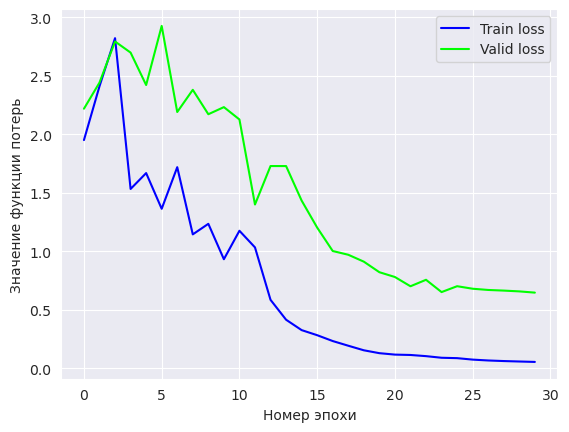

In [22]:
ax = losses.plot(colormap="brg")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Значение функции потерь")

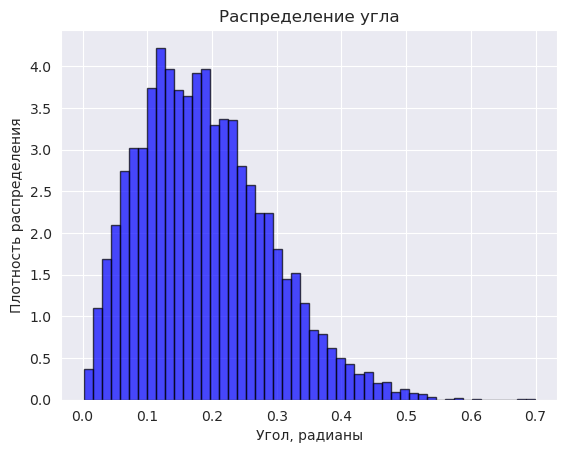

In [17]:
# Генерируем выборку с распределением Рэлея
sample_size = 8000
scale_parameter = 0.15
rayleigh_sample = np.random.rayleigh(scale_parameter, sample_size)

# Визуализация выборки
plt.hist(rayleigh_sample, bins=50, density=True, alpha=0.7, color='b', edgecolor='black')
plt.title('Распределение угла')
plt.xlabel('Угол, радианы')
plt.ylabel('Плотность распределения')
plt.show()

In [18]:
rayleigh_sample.mean()

0.18872453623007351

In [19]:
rayleigh_sample.std()

0.09910594624162719

In [20]:
np.quantile(rayleigh_sample, 0.68)

0.22834365596232284

NameError: name 'rayleigh_sample' is not defined

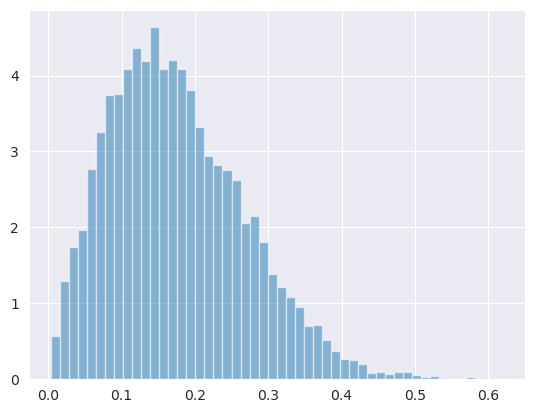

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем несколько параметров масштаба
scale_parameters = 0.14

# Генерируем выборки с разными параметрами масштаба
sample_size = 8000
rayleigh_samples = np.random.rayleigh(scale_parameters, sample_size)

# Визуализация выборок
plt.hist(rayleigh_samples, bins=50, density=True, alpha=0.5, label=f'Распределение Рэлея')
plt.hist(rayleigh_sample, bins=50, density=True, alpha=0.5, label=f'Угловое распределение')

plt.title('Сравнение распределений')
plt.xlabel('Угол, радианы')
plt.ylabel('Плотность распределения')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


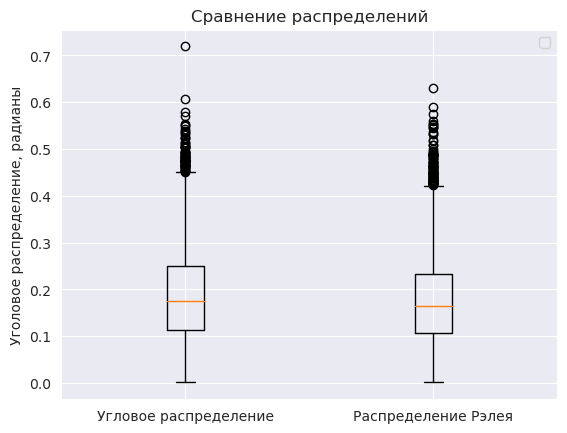

In [27]:
plt.boxplot([rayleigh_sample, rayleigh_samples], labels=[f'Угловое распределение', f'Распределение Рэлея'])

plt.title('Сравнение распределений')
plt.ylabel('Уголовое распределение, радианы')
plt.legend()
plt.show()